In [52]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Deepface Basic Usage

Notebook ma na celu zapoznanie się z podstawową funkcjonalnością DeepFace.

In [53]:
result = DeepFace.verify(img1_path = "../images/img1.jpg", img2_path = "../images/img1.jpg")
result

{'verified': True,
 'distance': 1.1102230246251565e-16,
 'threshold': 0.68,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 56,
   'y': 54,
   'w': 132,
   'h': 132,
   'left_eye': (40, 52),
   'right_eye': (83, 50)},
  'img2': {'x': 56,
   'y': 54,
   'w': 132,
   'h': 132,
   'left_eye': (40, 52),
   'right_eye': (83, 50)}},
 'time': 0.4}

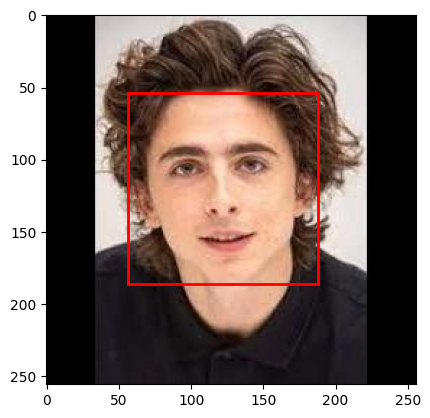

In [54]:
bbox = result['facial_areas']['img1']
x, y, w, h = bbox['x'], bbox['y'], bbox['w'], bbox['h']

img_path = '../images/img1.jpg'
image = cv2.imread(img_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots()
ax.imshow(image_rgb)
rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()


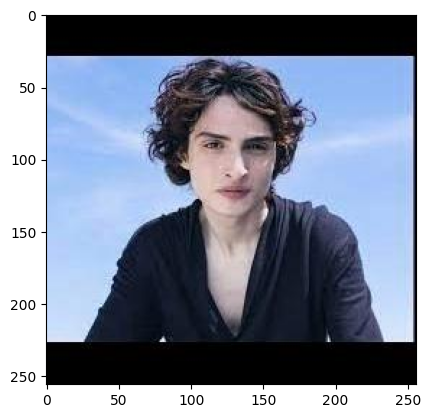

In [55]:
import cv2
import numpy as np

def extend_image_to_shape(img_path, new_width, new_height, fill_color=(0, 0, 0)):
    """
    Extends or crops an image to the specified dimensions.

    Parameters:
    - img_path: Path to the input image.
    - new_width: The target width of the image.
    - new_height: The target height of the image.
    - fill_color: The color used to fill the extended areas (default is black).

    Returns:
    - A new image with the specified dimensions.
    """
    image = cv2.imread(img_path)

    if image is None:
        raise FileNotFoundError(f"No file found at specified path: {img_path}")

    old_height, old_width = image.shape[:2]

    # Create a new canvas with the target size and fill color
    new_image = np.full((new_height, new_width, 3), fill_color, dtype=np.uint8)

    # Calculate the position of the old image on the new canvas
    x_offset = (new_width - old_width) // 2
    y_offset = (new_height - old_height) // 2

    # Ensure offsets are not negative
    x_offset = max(0, x_offset)
    y_offset = max(0, y_offset)

    # Determine the area of the original image that will be copied
    copy_width = min(old_width, new_width)
    copy_height = min(old_height, new_height)

    # Copy the original image onto the center of the new canvas
    # Adjusting for if the new dimensions are smaller than the original
    new_image[y_offset:y_offset+copy_height, x_offset:x_offset+copy_width] = image[0:copy_height, 0:copy_width]

    new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)

    return new_image

# Example usage:
img_path = '../images/img3.jpg' 
new_width = 256
new_height = 256

# Extend the image
extended_image = extend_image_to_shape(img_path, new_width, new_height)

# Save or display the extended image
plt.imshow(extended_image)


In [56]:
new_width = 256
new_height = 256
for img in ["img1", "img2", "img3"]:
    img_path = f"../images/{img}.jpg"
    extended_image = extend_image_to_shape(img_path, new_width, new_height)
    plt.imsave(f"../images/{img}.jpg", extended_image[:, :, ::-1])

In [57]:
result2 = DeepFace.verify(img1_path = "../images/img1.jpg", img2_path = "../images/img3.jpg")
result2

{'verified': False,
 'distance': 0.6884297955830971,
 'threshold': 0.68,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 57,
   'y': 55,
   'w': 130,
   'h': 130,
   'left_eye': (39, 52),
   'right_eye': (82, 49)},
  'img2': {'x': 93,
   'y': 63,
   'w': 77,
   'h': 77,
   'left_eye': None,
   'right_eye': None}},
 'time': 0.31}

In [58]:
dfs = DeepFace.find(img_path = "../images/img1.jpg", db_path = "../images")

24-03-20 00:11:37 - Found 0 newly added image(s), 0 removed image(s), 3 replaced image(s).


Finding representations: 100%|██████████| 3/3 [00:00<00:00,  9.99it/s]


24-03-20 00:11:37 - 🔴 Exception while extracting faces from ../images/img2.jpg: Face could not be detected in ../images/img2.jpg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
24-03-20 00:11:37 - There are now 3 representations in ds_vggface_opencv_v2.pkl
24-03-20 00:11:37 - Searching ../images/img1.jpg in 3 length datastore
24-03-20 00:11:37 - find function duration 0.44497013092041016 seconds


In [59]:
embedding_objs = DeepFace.represent(img_path = "../images/img1.jpg")
embedding_objs

[{'embedding': [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0019284998656232848,
   0.0,
   0.0,
   0.0018363786084811095,
   0.0,
   0.055221211080243256,
   0.0,
   0.0,
   0.0025282002677679636,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.08202896769467619,
   0.01662618224505079,
   0.0,
   0.0,
   0.0,
   0.0038310789949871343,
   0.0,
   0.0,
   0.0,
   0.007691593517005075,
   0.0,
   0.0,
   0.0,
   0.0,
   0.03937141490734064,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.06176404366531874,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.12555010301554598,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0025241218868118117,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.023824663177010413,
   0.0,
   0.0651587626655899,
   0.0,
   0.0,
   0.0,

In [60]:
embedding = embedding_objs[0]["embedding"]

In [61]:
objs = DeepFace.analyze(img_path = "../images/img1.jpg", 
        actions = ['age', 'gender', 'race', 'emotion']
)

Action: age:   0%|          | 0/4 [00:00<?, ?it/s]    

Action: emotion: 100%|██████████| 4/4 [00:00<00:00,  5.27it/s]


In [62]:
objs

[{'age': 23,
  'region': {'x': 57,
   'y': 55,
   'w': 130,
   'h': 130,
   'left_eye': (39, 52),
   'right_eye': (82, 49)},
  'face_confidence': 0.89,
  'gender': {'Woman': 0.1340800430625677, 'Man': 99.86591339111328},
  'dominant_gender': 'Man',
  'race': {'asian': 0.03060564814020086,
   'indian': 1.6413946683046023,
   'black': 0.01500206943380874,
   'white': 25.416614140070326,
   'middle eastern': 59.47350618085302,
   'latino hispanic': 13.422877396516645},
  'dominant_race': 'middle eastern',
  'emotion': {'angry': 1.9034896045923233,
   'disgust': 0.0004120498488191515,
   'fear': 12.436208128929138,
   'happy': 1.4470305293798447,
   'sad': 8.053331822156906,
   'surprise': 0.7712040096521378,
   'neutral': 75.38832426071167},
  'dominant_emotion': 'neutral'}]